In [17]:
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (11, 5)

`Создадим функцию для вычисления исходной функции, изобразим ее график.`

In [143]:
def f(x):
    return np.sin(x / 5.) * np.exp(x / 10.) + 5 * np.exp(-x / 2.)

In [144]:
xs = np.arange(0, 15, 0.1)
ys = map(f, xs)

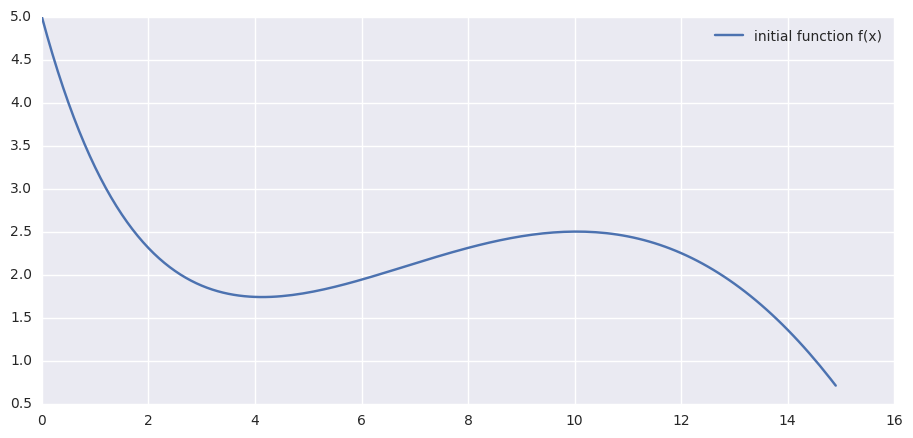

In [145]:
plt.plot(xs, ys, label="initial function f(x)")
plt.legend()

`Попробуем приблизить функцию f полиномом первого порядка. Коэффициенты полинома подберем, решив систему уравнений при условии, что полином проходит через точки (1, f(1)) и (15, f(15)).` 

In [146]:
A_1 = np.array([[1, 1], [1, 15]])
b_1 = np.array([f(1), f(15)])

In [148]:
w_1 = sp.linalg.solve(A_1, b_1)
w_1

array([ 3.43914511, -0.18692825])

In [149]:
def poly1(x, w=w_1):
    poly = lambda x: sum([w[i] * (x ** i) for i in xrange(len(w))])
    f = poly(x)
    return f

In [150]:
y1s = map(poly1, xs)

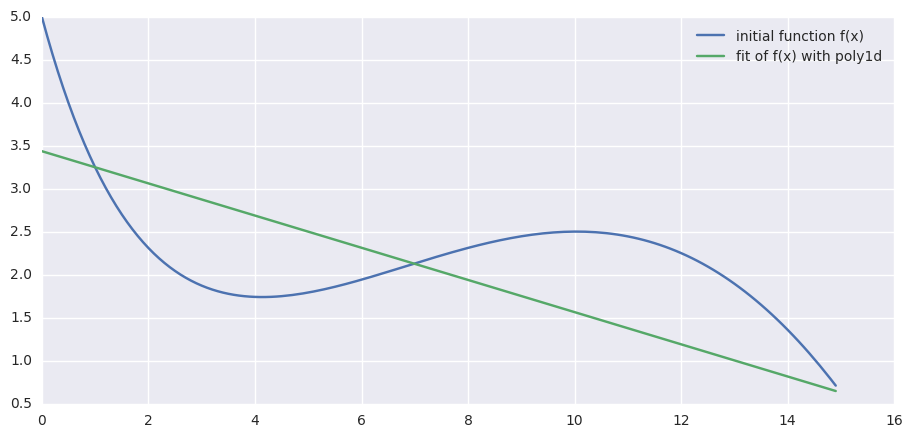

In [151]:
plt.plot(xs, ys, label="initial function f(x)")
plt.plot(xs, y1s, label="fit of f(x) with poly1d")
plt.legend()

`То же для полинома 2-й степени через точки 1, 8 и 15.`

In [152]:
A_2 = np.array([[1, 1, 1], [1, 8, 8*8], [1, 15, 15*15]])
b_2 = np.array([f(1), f(8), f(15)])

In [153]:
w_2 = sp.linalg.solve(A_2, b_2)
w_2

array([ 3.32512949, -0.06531159, -0.00760104])

In [154]:
def poly2(x, w=w_2):
    poly = lambda x: sum([w[i] * (x ** i) for i in xrange(len(w))])
    f = poly(x)
    return f

In [155]:
y2s = map(poly2, xs)

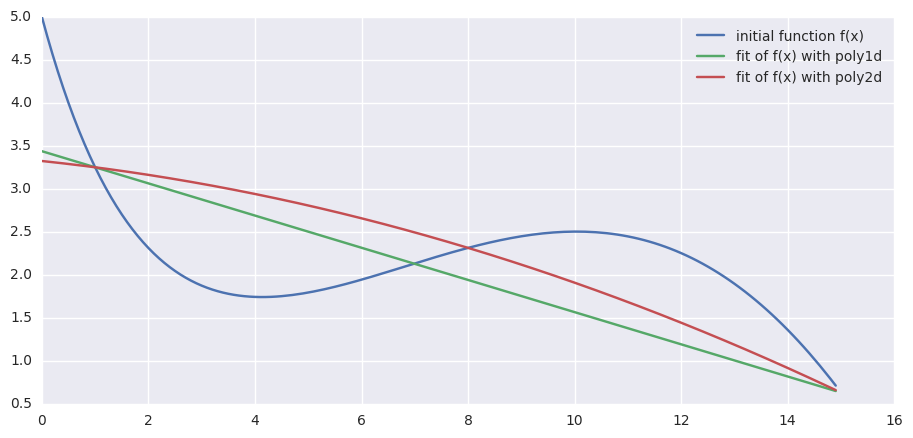

In [156]:
plt.plot(xs, ys, label="initial function f(x)")
plt.plot(xs, y1s, label="fit of f(x) with poly1d")
plt.plot(xs, y2s, label="fit of f(x) with poly2d")
plt.legend()

`То же для полинома 3-й степени через точки 1, 4, 10 и 15.`

In [165]:
A_3 = np.array([[1, 1, 1, 1], [1, 4, 4 ** 2, 4 ** 3], [1, 10, 10 ** 2, 10 ** 3], [1, 15, 15 ** 2, 15 ** 3]])
b_3 = np.array([f(1), f(4), f(10), f(15)])

In [166]:
w_3 = sp.linalg.solve(A_3, b_3)
np.round(w_3, 2)

array([ 4.36, -1.3 ,  0.19, -0.01])

In [163]:
def poly3(x, w=w_3):
    poly = lambda x: sum([w[i] * (x ** i) for i in xrange(len(w))])
    f = poly(x)
    return f

In [164]:
y3s = map(poly3, xs)

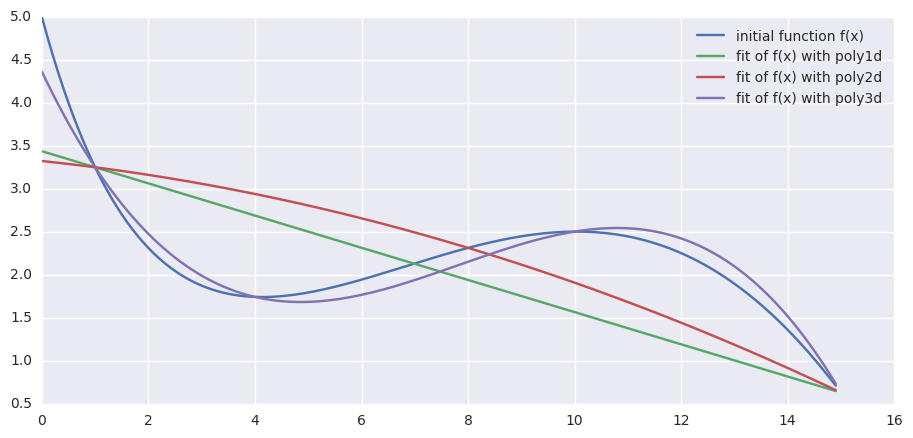

In [161]:
plt.plot(xs, f(xs), label="initial function f(x)")
plt.plot(xs, y1s, label="fit of f(x) with poly1d")
plt.plot(xs, y2s, label="fit of f(x) with poly2d")
plt.plot(xs, y3s, label="fit of f(x) with poly3d")
plt.legend()